# Dataset Analysis

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [185]:
columns = ['Synonyms', 'Title', 'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Demographic', 'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites']
drop_columns = ['Title', 'Japanese', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered', 'Genres', 'Demographic', 'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites']
df = pd.read_csv('data.csv', names=columns)
df

,Synonyms,Title,Japanese,English,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Source,Genres,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites
0,Frieren at the Funeral,Sousou no Frieren,葬送のフリーレン,Frieren: Beyond Journey's End,['TV'],28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",['Fall 2023'],Fridays at 23:00 (JST),...,['Manga'],"['Adventure', 'Drama', 'Fantasy']",['Shounen'],24 min. per ep.,PG-13 - Teens 13 or older,9.32,1,185,946629,56552
1,NaN,One Piece Fan Letter,ONE PIECE FAN LETTER,NaN,['TV Special'],1,Finished Airing,"Oct 20, 2024",NaN,NaN,...,['Light novel'],"['Action', 'Adventure', 'Fantasy']",['Shounen'],24 min.,PG-13 - Teens 13 or older,9.14,2,2947,60741,1587
2,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,['TV'],64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",['Spring 2009'],Sundays at 17:00 (JST),...,['Manga'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Shounen'],24 min. per ep.,R - 17+ (violence & profanity),9.09,3,3,3439315,229593
3,NaN,Steins;Gate,STEINS;GATE,Steins;Gate,['TV'],24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",['Spring 2011'],Wednesdays at 02:05 (JST),...,Visual novel,"['Drama', 'Sci-Fi', 'Suspense']",NaN,24 min. per ep.,PG-13 - Teens 13 or older,9.07,4,14,2635083,192339
4,NaN,Shingeki no Kyojin Season 3 Part 2,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,['TV'],10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",['Spring 2019'],Mondays at 00:10 (JST),...,['Manga'],"['Action', 'Drama', 'Suspense']",['Shounen'],23 min. per ep.,R - 17+ (violence & profanity),9.05,5,21,2367036,59878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,NaN,Aki no Puzzle,秋のパズル,Puzzle of Autumn,['Movie'],1,Finished Airing,2003,NaN,NaN,...,Original,NaN,NaN,6 min.,R+ - Mild Nudity,2.44,13656,10885,2571,0
13656,NaN,Kokuhaku,コクハク,NaN,['ONA'],1,Finished Airing,"Aug 27, 2015",NaN,NaN,...,Original,NaN,NaN,40 sec.,R - 17+ (violence & profanity),2.40,13657,7509,7376,17
13657,NaN,Hametsu no Mars,破滅のマルス,Mars of Destruction,['OVA'],1,Finished Airing,"Jul 6, 2005",NaN,NaN,...,Visual novel,"['Action', 'Horror', 'Sci-Fi']",NaN,19 min.,R - 17+ (violence & profanity),2.23,13658,2756,68215,296
13658,Utsu-musume Sayuri,Utsu Musume Sayuri,打つ娘サユリ,Striking Daughter,['OVA'],1,Finished Airing,2003,NaN,NaN,...,Original,"['Avant Garde', 'Comedy']",NaN,3 min.,R+ - Mild Nudity,2.00,13659,4868,21861,53


### Split *Aired* column into *from* and *to*

In [186]:
df = df.dropna(subset=drop_columns)
df['Aired_from'] = df['Aired'].apply(lambda x: x.split(' to')[0] if ' to ' in x else x)

df['Aired_to'] = df['Aired'].apply(lambda x: x.split(' to')[1] if ' to ' in x else None)

df['Duration'] = df['Duration'].apply(lambda x: x.split(' min')[0] if ' min' in x else x)

C:\Users\mcurt\AppData\Local\Temp\ipykernel_20808\3678685425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aired_from'] = df['Aired'].apply(lambda x: x.split(' to')[0] if ' to ' in x else x)
C:\Users\mcurt\AppData\Local\Temp\ipykernel_20808\3678685425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aired_to'] = df['Aired'].apply(lambda x: x.split(' to')[1] if ' to ' in x else None)
C:\Users\mcurt\AppData\Local\Temp\ipykernel_20808\3678685425.py:6: SettingWithCopyWarning: 
A value is trying

### Encode rating categories

In [187]:
unique = np.unique(df['Rating'])

ratings = {x: unique[x] for x in range(len(unique))}

df['Rating'] = df['Rating'].apply(lambda x: list(filter(lambda y: ratings[y] == x, ratings))[0])

C:\Users\mcurt\AppData\Local\Temp\ipykernel_20808\3011804542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].apply(lambda x: list(filter(lambda y: ratings[y] == x, ratings))[0])


### Drop redundant columns

In [188]:
df = df.drop('Aired', axis=1)

df

,Synonyms,Title,Japanese,English,Type,Episodes,Status,Premiered,Broadcast,Producers,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,Aired_from,Aired_to
0,Frieren at the Funeral,Sousou no Frieren,葬送のフリーレン,Frieren: Beyond Journey's End,['TV'],28,Finished Airing,['Fall 2023'],Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",...,['Shounen'],24,2,9.32,1,185,946629,56552,"Sep 29, 2023","Mar 22, 2024"
2,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,['TV'],64,Finished Airing,['Spring 2009'],Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",...,['Shounen'],24,3,9.09,3,3,3439315,229593,"Apr 5, 2009","Jul 4, 2010"
4,NaN,Shingeki no Kyojin Season 3 Part 2,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,['TV'],10,Finished Airing,['Spring 2019'],Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",...,['Shounen'],23,3,9.05,5,21,2367036,59878,"Apr 29, 2019","Jul 1, 2019"
5,Gintama' (2015),Gintama°,銀魂°,Gintama Season 4,['TV'],51,Finished Airing,['Spring 2015'],Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']",...,['Shounen'],24,2,9.05,6,340,649153,16891,"Apr 8, 2015","Mar 30, 2016"
7,Gintama (2011),Gintama',銀魂',Gintama Season 2,['TV'],51,Finished Airing,['Spring 2011'],Mondays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu', 'Trinity Sou...",...,['Shounen'],24,2,9.03,8,399,572942,8254,"Apr 4, 2011","Mar 26, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12897,Baromu One,Barom One,バロムワン,Barom 1,['TV'],13,Finished Airing,['Winter 2003'],Unknown,['AT-X'],...,['Shounen'],24,2,5.11,12897,10499,2888,3,"Dec 7, 2002","Mar 22, 2003"
13084,"Genma Taisen, Genma Wars: Eve of Mythology, Gh...",Genma Taisen: Shinwa Zenya no Shou,幻魔大戦－神話前夜の章,Genma Wars,['TV'],13,Finished Airing,['Winter 2002'],Unknown,['Groove Corporation'],...,['Shounen'],25,2,4.95,13084,10867,2586,1,"Feb 2, 2002","May 11, 2002"
13283,NaN,High & Low: G-Sword,HiGH&LOW g-sword,NaN,['TV'],5,Finished Airing,['Winter 2017'],Unknown,['add some'],...,['Shounen'],56 sec. per ep.,0,4.76,13283,14112,974,0,"Mar 27, 2017","Mar 31, 2017"
13351,NaN,Tesla Note,テスラノート,Tesla Note,['TV'],13,Finished Airing,['Fall 2021'],Sundays at 23:00 (JST),"['Kodansha', 'Movic', 'BS11', 'JR East Marketi...",...,['Shounen'],24,2,4.67,13351,4596,25054,91,"Oct 3, 2021","Dec 26, 2021"


### Check unique values in each column to verify integrity

In [189]:
print(df.columns)
# print(np.unique(df['Synonyms']))
# print(drop_columns.remove('Aired'))
print(list(set(drop_columns).difference(set(['Aired']))))
for i in list(set(drop_columns).difference(set(['Aired']))):
    print(f'Column: {i}')
    print(np.unique(df[i]))
    print('-----------')

Index(['Synonyms', 'Title', 'Japanese', 'English', 'Type', 'Episodes',
       'Status', 'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios',
       'Source', 'Genres', 'Demographic', 'Duration', 'Rating', 'Score',
       'Ranked', 'Popularity', 'Members', 'Favorites', 'Aired_from',
       'Aired_to'],
      dtype='object')
['Favorites', 'Rating', 'Genres', 'Japanese', 'Premiered', 'Title', 'Popularity', 'Status', 'Episodes', 'Demographic', 'Type', 'Ranked', 'Members', 'Duration', 'Score']
Column: Favorites
[     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     26     27     28     29     30
     31     32     33     34     35     36     37     38     39     40
     41     42     43     44     45     46     48     49     50     51
     52     53     55     57     58     59     60     61     62     63
     65     66     67     68     69     70     71   

### Cleanse dataset of records with unwanted values and reformat column values

In [190]:
df['Demographic'] = df['Demographic'].apply(lambda x: x[x.index('[')+2:len(x)-2])

df['Type'] = df['Type'].apply(lambda x: x[x.index('[')+2:len(x)-2])

df = df[df['Episodes'] != 'Unknown']
df = df[df['Premiered'] != '?']

df['Premiered'] = df['Premiered'].apply(lambda x: x[x.index('[')+2:len(x)-2])

df['Duration'] = df['Duration'].apply(lambda x: re.match(re.compile('\d+'), x).group())

df['Producers'] = df['Producers'].apply(lambda x: x.replace('[', "").replace(']', "").replace("'", ""))



df

,Synonyms,Title,Japanese,English,Type,Episodes,Status,Premiered,Broadcast,Producers,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,Aired_from,Aired_to
0,Frieren at the Funeral,Sousou no Frieren,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,Finished Airing,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",...,Shounen,24,2,9.32,1,185,946629,56552,"Sep 29, 2023","Mar 22, 2024"
2,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...",...,Shounen,24,3,9.09,3,3,3439315,229593,"Apr 5, 2009","Jul 4, 2010"
4,NaN,Shingeki no Kyojin Season 3 Part 2,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",...,Shounen,23,3,9.05,5,21,2367036,59878,"Apr 29, 2019","Jul 1, 2019"
5,Gintama' (2015),Gintama°,銀魂°,Gintama Season 4,TV,51,Finished Airing,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu",...,Shounen,24,2,9.05,6,340,649153,16891,"Apr 8, 2015","Mar 30, 2016"
7,Gintama (2011),Gintama',銀魂',Gintama Season 2,TV,51,Finished Airing,Spring 2011,Mondays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",...,Shounen,24,2,9.03,8,399,572942,8254,"Apr 4, 2011","Mar 26, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12897,Baromu One,Barom One,バロムワン,Barom 1,TV,13,Finished Airing,Winter 2003,Unknown,AT-X,...,Shounen,24,2,5.11,12897,10499,2888,3,"Dec 7, 2002","Mar 22, 2003"
13084,"Genma Taisen, Genma Wars: Eve of Mythology, Gh...",Genma Taisen: Shinwa Zenya no Shou,幻魔大戦－神話前夜の章,Genma Wars,TV,13,Finished Airing,Winter 2002,Unknown,Groove Corporation,...,Shounen,25,2,4.95,13084,10867,2586,1,"Feb 2, 2002","May 11, 2002"
13283,NaN,High & Low: G-Sword,HiGH&LOW g-sword,NaN,TV,5,Finished Airing,Winter 2017,Unknown,add some,...,Shounen,56,0,4.76,13283,14112,974,0,"Mar 27, 2017","Mar 31, 2017"
13351,NaN,Tesla Note,テスラノート,Tesla Note,TV,13,Finished Airing,Fall 2021,Sundays at 23:00 (JST),"Kodansha, Movic, BS11, JR East Marketing & Com...",...,Shounen,24,2,4.67,13351,4596,25054,91,"Oct 3, 2021","Dec 26, 2021"


### Save clean data to CSV

In [191]:
df.to_csv('clean.csv', index=False, header=None)

## Analysis

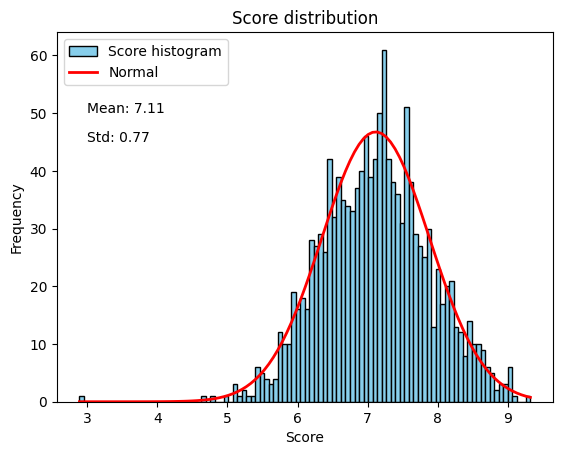

In [192]:
# Plotting a basic histogram
count, bins, ignored = plt.hist(df['Score'], bins=100, color='skyblue', edgecolor='black', label='Score histogram')
 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score distribution')

mean = np.mean(df['Score'])
std = np.std(df['Score'])

plt.text(3, 50, f'Mean: {str(round(mean,2))}')
plt.text(3,45, f'Std: {str(round(std,2))}')

plt.plot(bins,90/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * std**2)),
         linewidth=2, color='r', label='Normal')

plt.legend(loc='upper left')
 
# Display 
plt.show()

[[ 1.         -0.01707626]
 [-0.01707626  1.        ]]


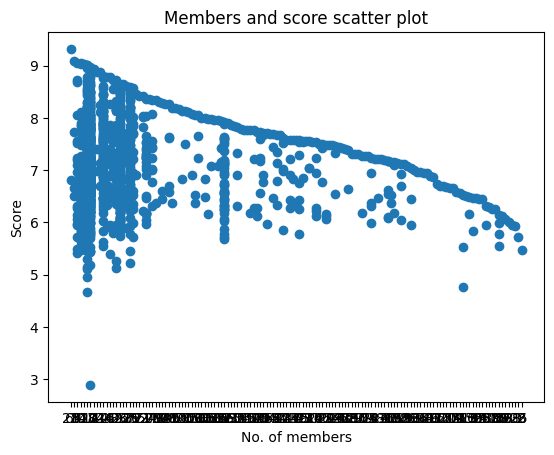

In [193]:
plt.scatter(df['Episodes'], df['Score'])
plt.xlabel('No. of members')
plt.ylabel('Score')

plt.title('Members and score scatter plot')

print(np.corrcoef(pd.to_numeric(df['Episodes']), pd.to_numeric(df['Score'])))

plt.show()

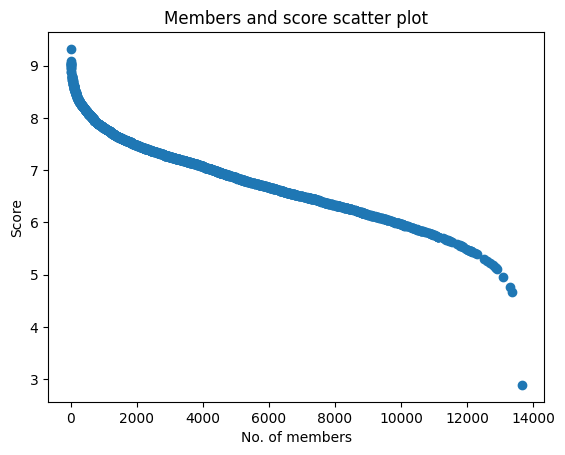

In [194]:
plt.scatter(df['Ranked'], df['Score'])
plt.xlabel('No. of members')
plt.ylabel('Score')

plt.title('Members and score scatter plot')

plt.show()